y0 =  -15.857 +/- 3.783
v0 =   30.277 +/- 2.812
 g =    9.870 +/- 0.921


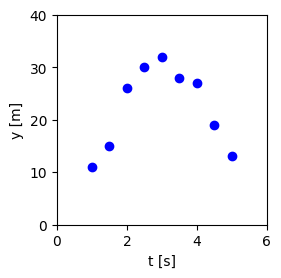

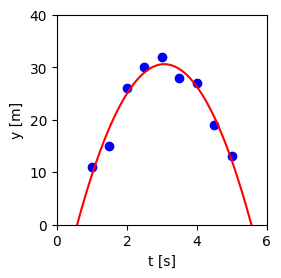

In [2]:
#/usr/bin/env python3
# -*- coding: utf-8 -*-

# Fittare i dati contenuti nel file "data.csv" assumendo che rappresentino
# la legge oraria di un grave che si muove verticalmente in prossimità della
# superficie terrestre.

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Lo script crea un file "data.csv" con i dati da analizzare.
mm = np.array([[1.0, 11.0],[1.5, 15.0],[2.0, 26.0],[2.5, 30.0],[3.0, 32.0],[3.5, 28.0],[4.0, 27.0],[4.5, 19.0],[5.0, 13.0]])
np.savetxt("data.csv", mm, delimiter=", ")

# Lettura e plot dei dati.

data = np.loadtxt("data.csv", delimiter=",")
tt = data[:,0] #prende solo la prima colonna dai dati
yy = data[:,1] #prende solo la seconda colonna dai dati
#tutto quello che c'è prima della virgola indica la prima dimensione (le righe), quello che c'è dopo
#indica la seconda dimensione (le colonne); i : indicano di prendere tutte le righe

fig = plt.figure(figsize=(3.0,3.0))
plt.axes([0.2,0.2,0.7,0.7])
plt.plot(tt, yy, "ob")
plt.xlabel(r"t [s]")
plt.ylabel(r"y [m]")
plt.xlim([0.0, 6.0])
plt.ylim([0.0, 40.0])
plt.savefig("data.png")

# Definizione del modello teorico.
# La prima variabile della funzione è la variabile indipendente,
# le altre variabili sono costanti del modello, che verranno trovate dal fit.

def grave(t, y0, v0, g):
    y = y0 + v0 * t - 0.5 * g * t**2
    return y

# Fit del modello ai dati.

#           y0   v0    g   <-- valori iniziali per l'algoritmo di fit
p_guess = (1.0, 1.0, 1.0)

ss = np.array([0.1 for t in tt])
p_opt, p_cov = curve_fit(grave, tt, yy, p_guess, sigma=ss, method="trf")

# Calcolo del modello su un range a piacere della variable indipendente.
tt_theo = np.linspace(0.0, 6.0, 101)

yy_theo = []
for t in tt_theo:
    # y = grave(t, p_opt[0], p_opt[1], p_opt[2], p_opt[3])
    y = grave(t, *p_opt)  # forma compatta della riga precedente
    yy_theo.append(y)
yy_theo = np.array(yy_theo)

# Il ciclo precedente si può fare in modo compatto con una list comprehension.
# yy_theo = np.array([grave(t, *p_opt) for t in tt_theo])

fig = plt.figure(figsize=(3.0,3.0))
plt.axes([0.2,0.2,0.7,0.7])
plt.plot(tt, yy, "ob")
plt.plot(tt_theo, yy_theo, "-r")
plt.xlabel(r"t [s]")
plt.ylabel(r"y [m]")
plt.xlim([0.0, 6.0])
plt.ylim([0.0, 40.0])
plt.savefig("data_fit.png")

# Stampa dei parametri di fit con l'errore stimato dalla matrice di covarianza:
# Nota: il programma stampa più cifre di quelle significative.
param = ("y0", "v0", "g")
errs = np.sqrt(np.diag(p_cov))
for p,v,e in zip(param, p_opt, errs):
    print("%2s = %8.3f +/- %5.3f" % (p, v, e))



RIASSUNTO:

In questa lezione si sono visti i principi di fit e funzioni interessanti; per quanto riguarda funzioni particolari di Python, cose interessanti sono:

1. quella di inserire i dati in un array, a partire da quello definire e salvare un file contenente i dati che può essere richiamo a scelta come loadtxt:

"nome lista" = np.array([])
np.savetxt("data.csv", "nome lista", delimiter=", ")

da cui poi è possibile richiamare la lista con np.loadtxt

2. il modo in cui è possibile leggere le liste: in una parentesi quadra legata ad un txt, il numero prima della virgola indica la prima dimensione (righe) e dopo la virgola la seconda dimensione (colonne); l'uso dei due punti : indica di considerare tutte le righe o colonne, lo 0 indica la prima riga o colonna, e così via.

3. Quando si esegue il plot di una figura l'ordine dei comandi è il seguente:
fig = plt.figure(figsize=(3.0,3.0))
plt.axes([0.2,0.2,0.7,0.7])
plt.plot("quello che sta sulla x", "quello che sta sulla y", "ob")
plt.xlabel("x [s]")
plt.ylabel("y [m]")
plt.xlim([0.0, 6.0])
plt.ylim([0.0, 40.0])
plt.savefig("nome dell'immagine.png")

4. list comprehension: è un modo di esprimere una lista in maniera sintetica dichiarando come dev'essere anzichè come un for

Per quanto riguarda i principi di fit, le cose da ricordare sono:

1. i valori di p_guess (p0), sono importantissimi da assegnare al fit in modo da farlo convergere;
2. p_opt e p_cov sono restituiti da curve_fit(funzione definita, x, y, p_guess, sigma=ss, method="trf" (facoltativo))
